# 1.4.2 Image Thresholding

## Simple Thresholding

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

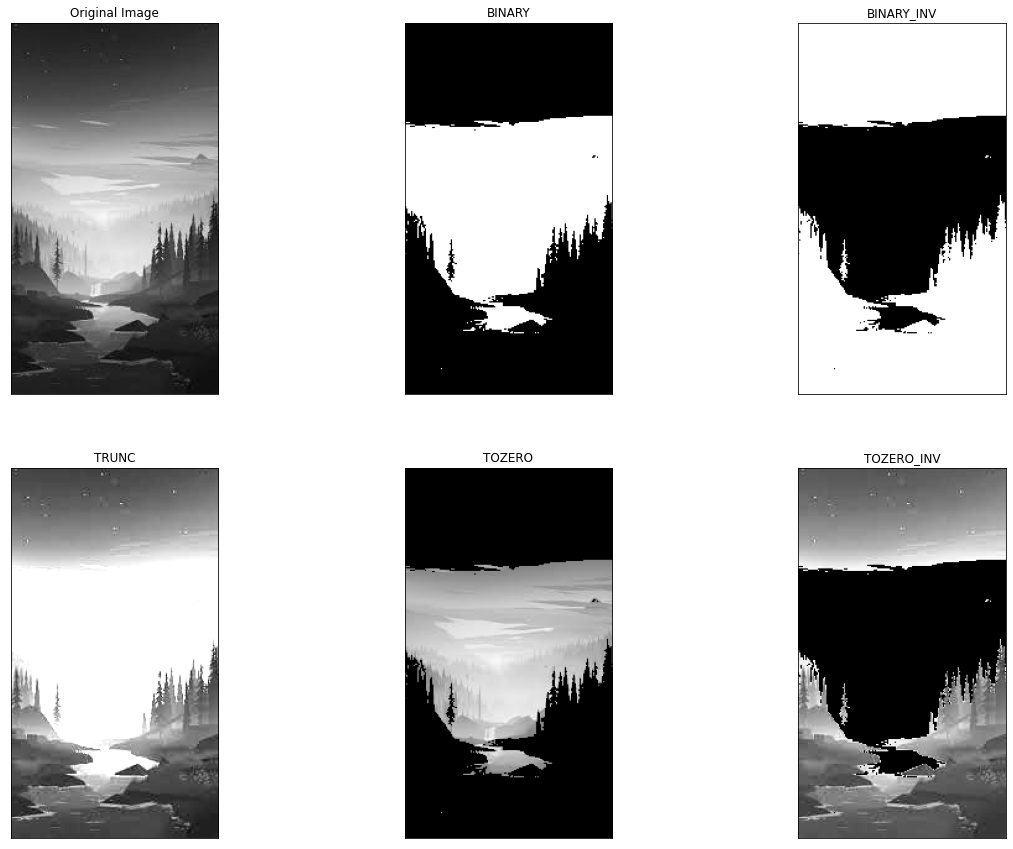

In [13]:
img = cv2.imread('pic2.jpg',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(20,15))
for i in range(6):
     plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
     plt.title(titles[i])
     plt.xticks([]),plt.yticks([])
plt.show()


In [24]:
h,w = 256, 512
img = np.zeros((h,w),np.uint8)
for i in range(h):
    for j in range(w):
        img[i,j]=(j)%256

In [25]:
cv2.imshow('image',gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

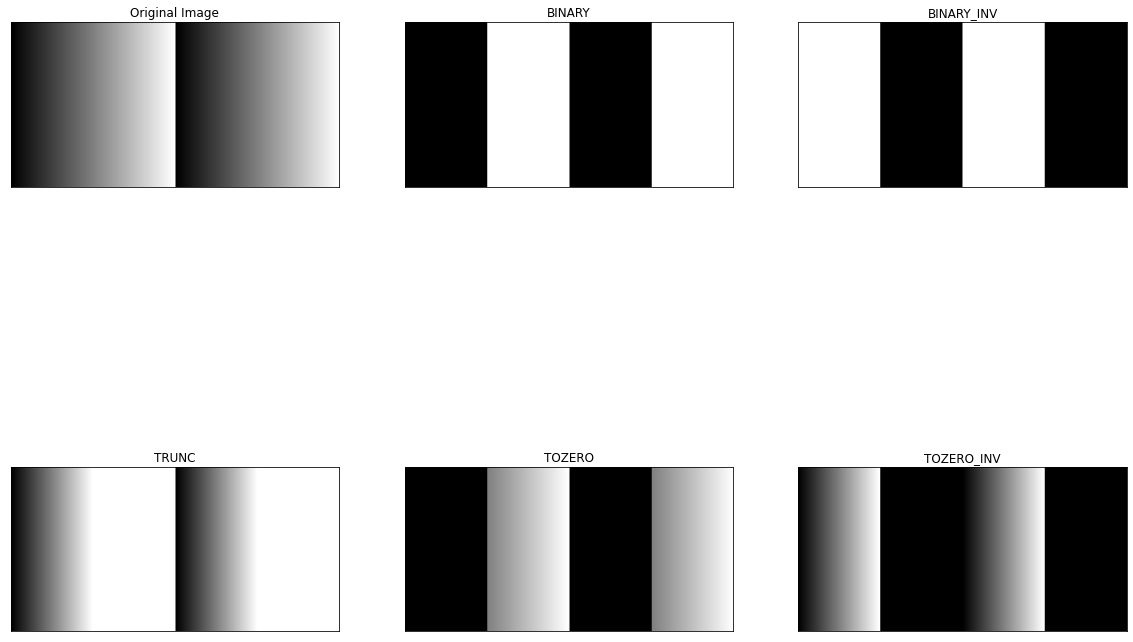

In [30]:
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(20,15))
for i in range(6):
     plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
     plt.title(titles[i])
     plt.xticks([]),plt.yticks([])
plt.show()

BINARY_INV : 0 -> 255 / 255 -> 0 <br>
TRUNC : 127 까지는 그대로 128부터는 흰색 <br>
TOZERO : 127 까지 검정색으로 그 이후는 그대로 <br>
TOZERO_INV : TOZERO 를 반대로

## Adaptive Thresholding


In [31]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

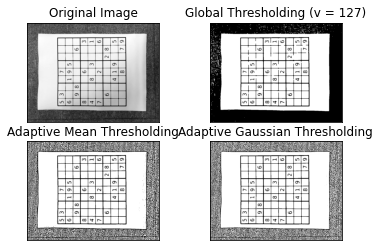

In [41]:
img = cv2.imread('sIMG_2164.jpg',0)
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Otsu’s Binarization

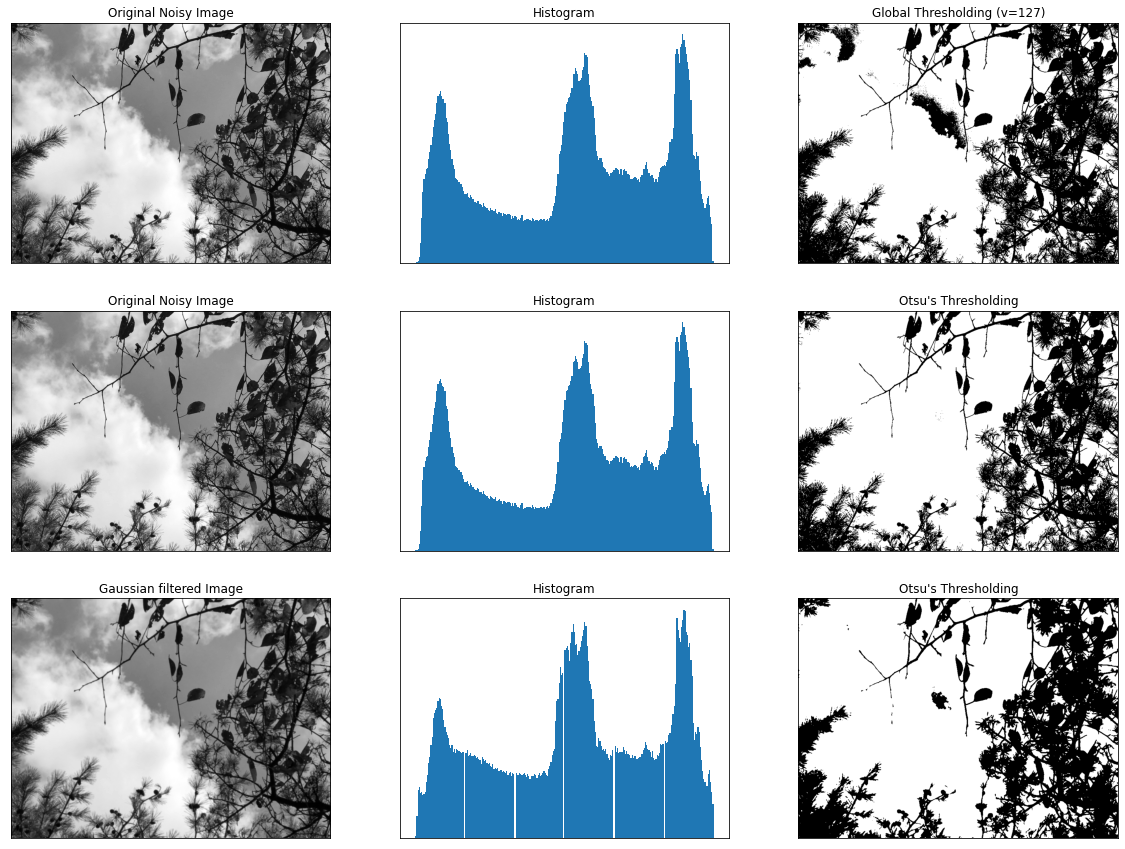

In [47]:
img = cv2.imread('sIMG_2180.jpg',0)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
    img, 0, th2,
    blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
    'Original Noisy Image','Histogram',"Otsu's Thresholding",
    'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
plt.figure(figsize=(20,15))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

## Histogram

In [48]:
img = cv2.imread('sIMG_2180.jpg',0)

In [56]:
h,w=img.shape

In [57]:
hist=np.zeros(256,np.uint32)

In [58]:
hist

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint32)

In [59]:
for i in range(h) :
    for j in range(w) :
        hist[img[i,j]]+=1

In [60]:
hist

array([   1,   14,   56,  193,  634, 1413, 2266, 2679, 2843, 2986, 3021,
       3298, 3533, 3774, 4029, 4340, 4559, 4751, 5101, 5323, 5401, 5489,
       5337, 5243, 5221, 5095, 4626, 4510, 4127, 3796, 3586, 3319, 3113,
       2980, 2709, 2665, 2628, 2585, 2506, 2510, 2403, 2283, 2193, 2200,
       2230, 2110, 2076, 2151, 2099, 2043, 1951, 1935, 1917, 1986, 1973,
       1879, 1856, 1794, 1906, 1803, 1764, 1744, 1688, 1647, 1737, 1698,
       1688, 1646, 1709, 1594, 1569, 1619, 1630, 1594, 1489, 1587, 1570,
       1549, 1532, 1564, 1545, 1529, 1411, 1504, 1433, 1503, 1454, 1379,
       1403, 1350, 1444, 1510, 1341, 1362, 1371, 1393, 1399, 1384, 1374,
       1342, 1441, 1402, 1324, 1376, 1362, 1344, 1349, 1383, 1390, 1355,
       1391, 1338, 1374, 1408, 1346, 1431, 1504, 1645, 1817, 1909, 2135,
       2446, 2838, 3458, 3570, 3760, 4095, 4499, 4805, 5079, 5123, 5258,
       5278, 5420, 5576, 6033, 6043, 6218, 6119, 6012, 5810, 5829, 5907,
       6159, 6261, 6703, 6635, 6576, 6035, 5678, 53